# Okavango_Scenario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from hydroeval import evaluator, nse, rmse, pbias
from pyemu.pst.pst_utils import SFMT,IFMT,FFMT
from tqdm import tqdm

flopy is installed in C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\flopy


# Set Path

In [2]:
wd_base = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base"
wd_bau = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_bau"
wd_rd = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_rd"
# os.chdir(wd)



# Create Dataframe from output.hru

In [3]:
from swatmf_pkgs.swatmf_viz import read_output_mgt, read_output_hru

# Read input.std to bring area and hru number

In [4]:
hru_rd = read_output_hru(wd_rd)

In [5]:
hru_rd_f = pd.DataFrame()
for i in tqdm(range(1, 258)):
    df = hru_rd.loc[hru_rd['sub'] == i]
    df = df[['mon', 'irr_m3']]
    df = df.groupby(['mon']).sum()
    df.rename(columns={'irr_m3':i}, inplace = True)
    hru_rd_f = pd.concat([hru_rd_f, df], axis=1)

100%|██████████| 257/257 [00:03<00:00, 83.24it/s]


In [14]:
hru_rd_f.T.to_csv('rd_irr.csv')

In [31]:
dff = hru_rd_f.T
dff

mon,1,2,3,4,5,6,7,8,9,10,11,12
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
dff = dff.sum()
type(dff)

pandas.core.series.Series

In [35]:
from matplotlib.ticker import FuncFormatter
from swatmf_pkgs.swatmf_viz import y_fmt

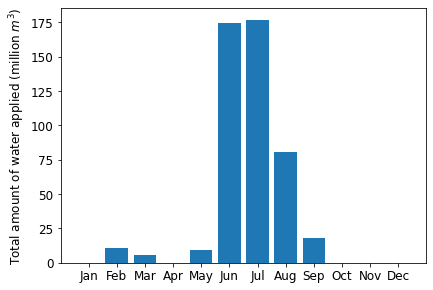

In [48]:
f, ax = plt.subplots(figsize=(6,4))
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
ax.bar(month_names, dff.tolist())
ax.tick_params(axis='both', labelsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax.set_ylabel(r'Total amount of water applied (million $m^3$)', fontsize = 12)
plt.tight_layout()
plt.savefig('irrigated_bar.png', dpi=300, bbox_inches="tight")
plt.show()


In [30]:
dff

475481405.9100003